<a href="https://colab.research.google.com/github/LukeANewton/CarletonU-Building-Classification/blob/master/SYSC4906_Assig3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SYSC4906 Assignment 3

**Group Name:** 

**Student names:** Luke Newton, Eric Bedard

**Student numbers:** 


# Discussion of Solution
Your notebook must begin with **this** text cell containing a description of your solution. In this discussion, include links to any resources that you used in developing your solution. Use proper MarkDown syntax to format your discussion.**This description should be approximately 500 words in length and cover the following:**

1. Which machine learning approach did you use?

2. How did you split your data between training and testing? 
_(e.g. hold-out test, cross-validation, repeated bootstrap samples, etc)_

3. How did you train your classifier?
If you used transfer learning, describe how you did so.

4. How did you estimate your future performance _(worst recall, best precision, overall accuracy)_?

   **Here are our final predictions:**
   1. Building with worst recall:
   2. Building with best precision
   3. Overall accuracy)

5. Discuss the performance of your model. Which buildings did it do the best/worst on and why? What are the strengths and limitations of your method. 

6. What would you have done differently if you had more time?


# Code to Train Your Method
_We will look at this, but will not run it when measuring your accuracy. Please structure your training code into logical steps, so that we can easily understand it_
## Step 1: Load the image dataset

precondition: image zip must first be uploaded to google colab. As the download link is on cuLearn, we cannot directly download the file here

In [34]:
from glob import glob

# List of building codes to use throughout notebook.
buildingCodes = ('AA', 'CB', 'CT', 'DT', 'FH', 'HP', 'HS', 'LB', 'MC', 'ME', 'ML', 'PA', 'RB', 'RO', 'SA', 'TB')

!unzip All_Images_500x500.zip

#get list of file names for each building and place into a dictionary
building_images = {}
for name in buildingCodes:
  building_images[name] = glob('All_Images_500x500/' + name + '/*.jpg')


Archive:  All_Images_500x500.zip
replace All_Images_500x500/AA/030_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: All_Images_500x500/AA/030_1.jpg  
  inflating: All_Images_500x500/AA/030_2.jpg  
  inflating: All_Images_500x500/AA/030_3.jpg  
  inflating: All_Images_500x500/AA/030_4.jpg  
  inflating: All_Images_500x500/AA/030_5.jpg  
  inflating: All_Images_500x500/AA/081_1.jpg  
  inflating: All_Images_500x500/AA/081_2.jpg  
  inflating: All_Images_500x500/AA/081_3.jpg  
  inflating: All_Images_500x500/AA/081_4.jpg  
  inflating: All_Images_500x500/AA/081_5.jpg  
  inflating: All_Images_500x500/AA/120-1.jpg  
  inflating: All_Images_500x500/AA/120-2.jpg  
  inflating: All_Images_500x500/AA/120-3.jpg  
  inflating: All_Images_500x500/AA/120-4.jpg  
  inflating: All_Images_500x500/AA/120-5.jpg  
  inflating: All_Images_500x500/AA/120-6.jpg  
  inflating: All_Images_500x500/AA/128-1.jpg  
  inflating: All_Images_500x500/AA/128-2.jpg  
  inflating: All_Images_500x500/AA/128-3

##Step 2: check that data was loaded correctly

optional step for data visualization

AA : 203 images
sample:


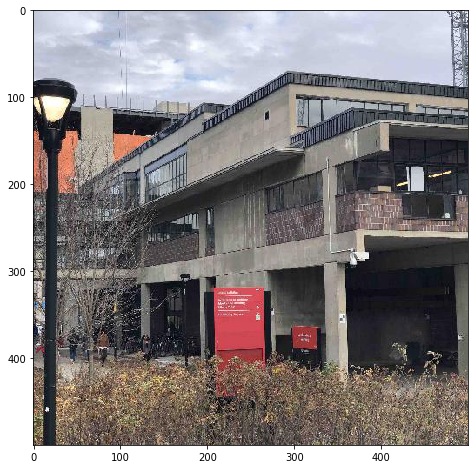

CB : 204 images
sample:


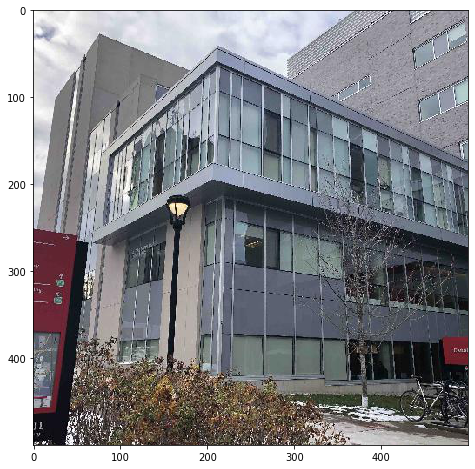

CT : 206 images
sample:


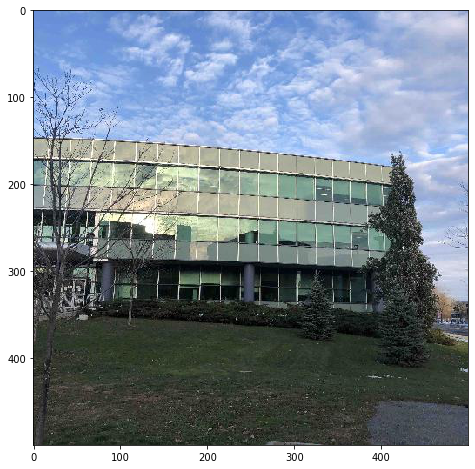

DT : 202 images
sample:


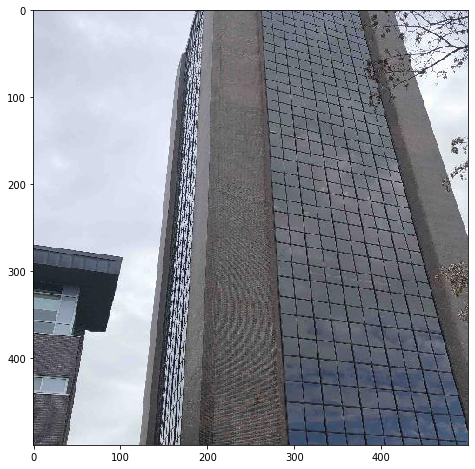

FH : 207 images
sample:


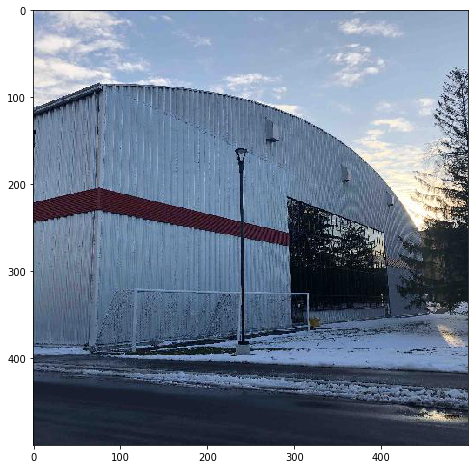

HP : 202 images
sample:


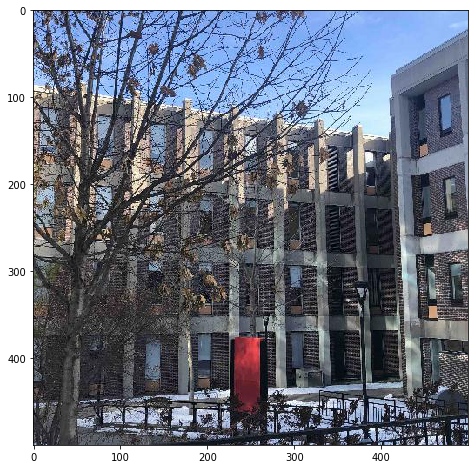

HS : 207 images
sample:


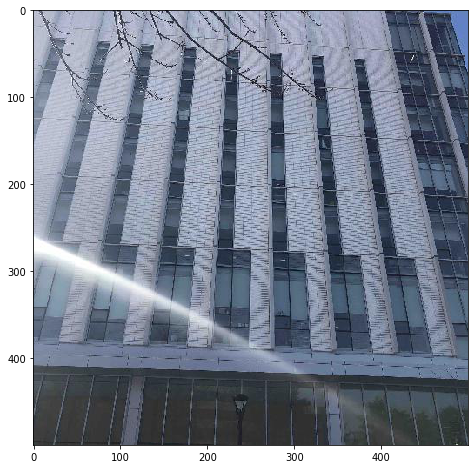

LB : 204 images
sample:


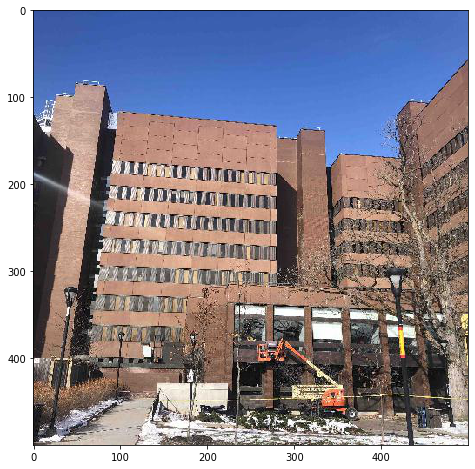

MC : 205 images
sample:


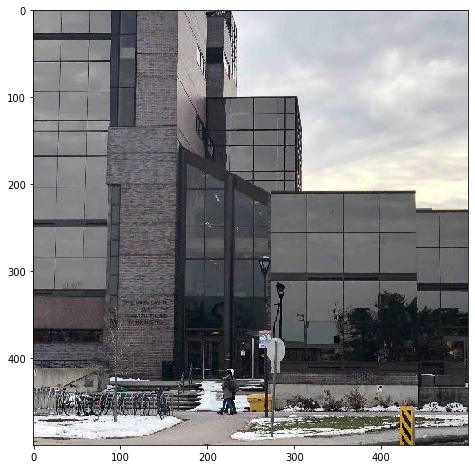

ME : 208 images
sample:


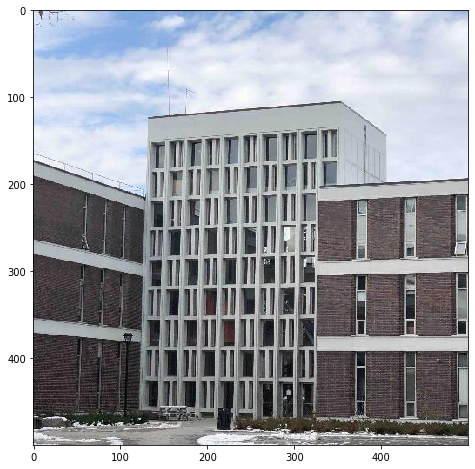

ML : 203 images
sample:


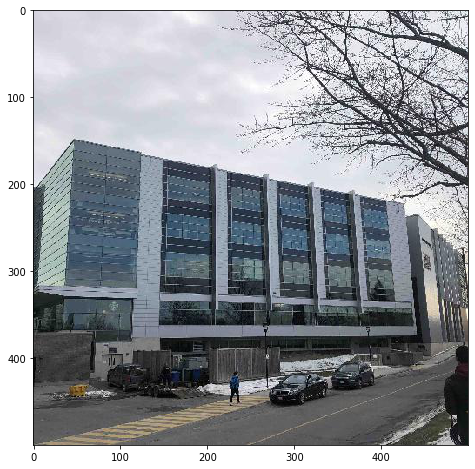

PA : 208 images
sample:


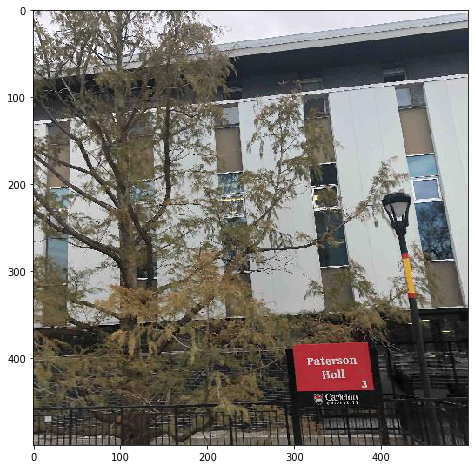

RB : 207 images
sample:


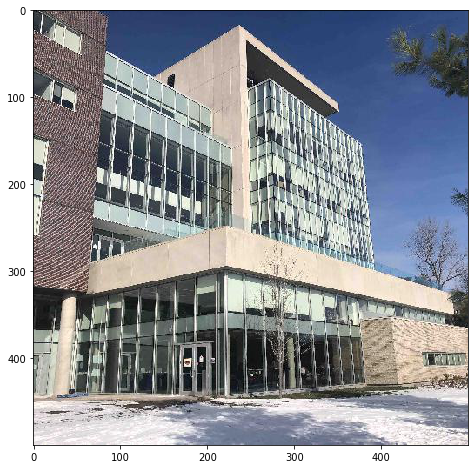

RO : 202 images
sample:


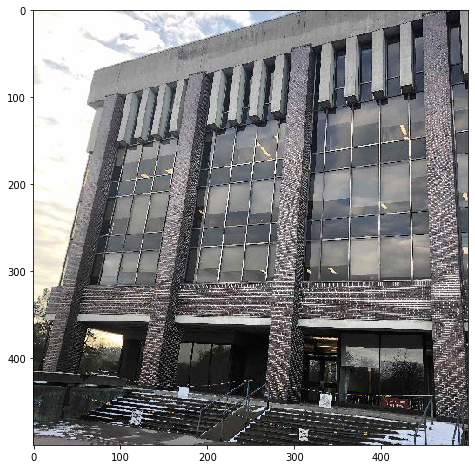

SA : 201 images
sample:


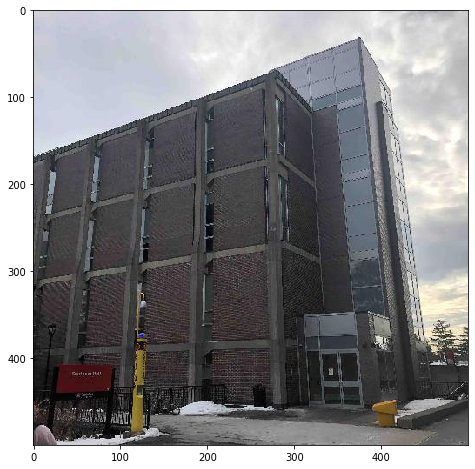

TB : 205 images
sample:


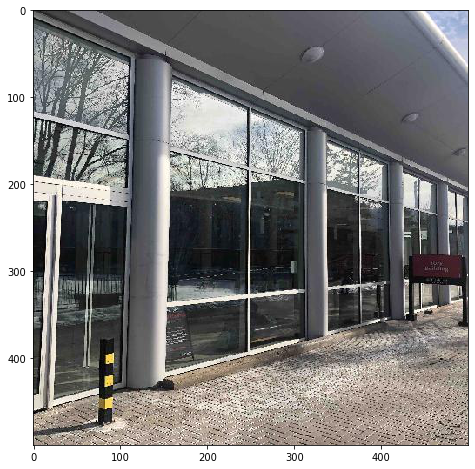

In [38]:
from PIL import Image
import matplotlib.pyplot as plt

for building in building_images:
  #display number of images in folder
  print(building, ":", len(building_images.get(building)), "images")
  print('sample:')
  #display first image in a folder
  plt.figure(figsize=(8,8))
  plt.imshow(Image.open(building_images.get(building)[0]))
  plt.show()



##Step 3: try assignment 2 code

In [2]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Activation
from keras.preprocessing.image import ImageDataGenerator
import keras
from numpy import expand_dims
import matplotlib.pyplot as plt

CLASSES = 16
    
# Load base model without top.
new_model = InceptionV3(weights='imagenet', include_top=False)

#freeze base layers
for layer in new_model.layers:
    layer.trainable = False

#add new layers
pool = GlobalAveragePooling2D()
dropout = Dropout(0.5)
dense = Dense(CLASSES)
activation = Activation('softmax')
x = pool(new_model.output)
x = dropout(x)
x = dense(x)
x = activation(x)

#compile new model
new_model = Model(input=new_model.input, output=x)
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

WIDTH = 500
HEIGHT = 500
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(width_shift_range=0.3,height_shift_range=0.3, \
                                   horizontal_flip=True, fill_mode='nearest', \
                                   preprocessing_function=keras.applications.inception_v3.preprocess_input,\
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory('/content/All_Images_500x500', target_size=(WIDTH, HEIGHT),\
                                                    batch_size=BATCH_SIZE, class_mode='categorical', subset='training')

validation_generator = train_datagen.flow_from_directory('/content/All_Images_500x500', target_size=(WIDTH, HEIGHT),\
                                                    batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

#train model
EPOCHS = 10
BATCH_SIZE = 32
STEPS_PER_EPOCH = 3
VALIDATION_STEPS = 1

history = new_model.fit_generator(train_generator, steps_per_epoch=STEPS_PER_EPOCH, \
                                  epochs=EPOCHS, validation_data=validation_generator,\
                                  validation_steps=VALIDATION_STEPS)

#plot loss and accuracy for each epoch
def plot_training(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

Using TensorFlow backend.















87916544/87910968 [==============================] - 6s 0us/step


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-4f49a4c88f5a>", line 12, in <module>
    new_model = InceptionV3(weights='imagenet', include_top=False)
  File "/usr/local/lib/python3.6/dist-packages/keras/applications/__init__.py", line 20, in wrapper
    return base_fun(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/applications/inception_v3.py", line 11, in InceptionV3
    return inception_v3.InceptionV3(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras_applications/inception_v3.py", line 391, in InceptionV3
    model.load_weights(weights_path)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py", line 458, in load_wrapper
    return load_function(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/network.py", line 1217, in load_w

KeyboardInterrupt: ignored

##Step N: Save the model to file

In [0]:
# Whatever code is required to save your trained model to a file. 
# Should be re-loaded by prepareModel() during testing.

#Required functions to test your method
_These are the five required methods that you must implement._

## prepareModel()
This function should prepare your model for multiple invocations of classifyImage(fname). For example, this function could be used to load a pre-trained model from a URL, where that model is then used by  classifyImage(fname). You should use global variables for any variables initialized by this function.

Runtime of this method is **limited to 5 minutes**, so please don’t retrain your network here. All training should be captured in a pre-trained model to be loaded by this method.


In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# List of building codes to use throughout notebook.
buildingCodes = ('AA', 'CB', 'CT', 'DT', 'FH', 'HP', 'HS', 'LB', 'MC', 'ME', 'ML', 'PA', 'RB', 'RO', 'SA', 'TB')

def prepareModel():
  global model # Sample global variable that you may populate here.

  model = 'No model loaded.'



## label = classifyImage(fname)
Accepts a filename (e.g. ‘test/ME/testImage1.jpg’) of a square JPG image with size at least 500x500 pixels.
Returns a 2-character label corresponding to the predicted building (see table of labels above)

Any variables initialized by prepareModel() should be declared as global within this function if you want to access them (e.g. a pre-trained model)


In [0]:
def classifyImage(fname):
  global model # Sample global variable that you may populate in prepareModel and use here.

  print("Predicting class of '{0:s}' using model '{1:s}'".format(fname,model))
  return buildingCodes[0] #Default behaviour to override


## label = worstRecall()
Returns the label of a building that you expect will have to lowest recall, when tested on new images

In [0]:
def worstRecall():
  return buildingCodes[0] #Default behaviour to override


## label = bestPrecision()
Returns the label of a building that you expect will have to highest precision, when tested on new images

In [0]:
def bestPrecision():
  return buildingCodes[0] #Default behaviour to override


##acc_score = estimatedAccuracy()
Returns the accuracy (between [0.0,1.0]) that you expect to achieve across all test images, assuming that each building is equally represented


In [0]:
# Function to return estimated accuracy that will be obtained across all test images
def estimatedAccuracy():
  return 1.0 #Default behaviour to override

# Test required functions
_We will replace the text below with our actual test code..._

Predicting class of 'SampleImages/AA_1.jpg' using model 'No model loaded.'


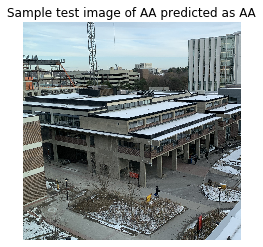

Correct!
Predicting class of 'SampleImages/CB_1.jpg' using model 'No model loaded.'


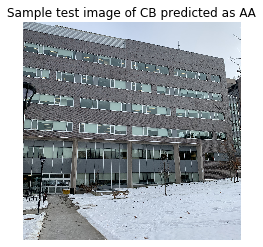

Incorrect...
Predicting class of 'SampleImages/DT_1.jpg' using model 'No model loaded.'


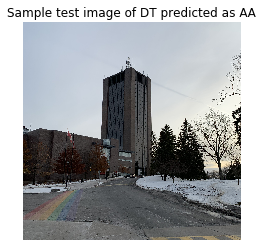

Incorrect...
Predicting class of 'SampleImages/HS_1.jpg' using model 'No model loaded.'


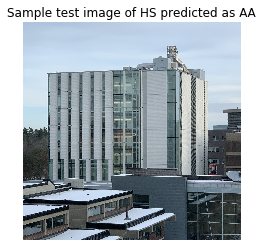

Incorrect...
Expected that worst recall would be on AA
Expected that best precision would be on AA
Expected total accuracy would be 1.000
Actual total accuracy is 0.250


In [0]:
import numpy as np
from PIL import Image, ExifTags
import matplotlib.pyplot as plt
from glob import glob


# First prepare the model:
prepareModel() # Limited to 5 minutes...

# Load (secret) test data into local Colab environment
!wget https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment3/Images/SampleImages.zip?raw=true
!unzip SampleImages.zip?raw=true #Should create 4 images
test_images = sorted(glob('SampleImages/*.jpg'))
actual_labels = (buildingCodes[0],buildingCodes[1],buildingCodes[3],buildingCodes[6])

# Classify sample test images:
TP = 0
for imgFname,actual_label in (zip(test_images,actual_labels)):
  pred_label = classifyImage(imgFname) # Predict the label of this image file

  # Plot the image with actual and predicted labels
  # Note that we may have to rotate the image, depending on the 
  # orientation of the camera. Use EXIF tags for this:
  im = Image.open(imgFname)
  for orientation in ExifTags.TAGS.keys() : 
    if ExifTags.TAGS[orientation]=='Orientation' : break 
  exif=dict(im._getexif().items())

  if exif[orientation] == 3 : 
    im=im.rotate(180, expand=True)
  elif exif[orientation] == 6 : 
    im=im.rotate(270, expand=True)
  elif exif[orientation] == 8 : 
    im=im.rotate(90, expand=True)

  im = im.convert('RGB') # May not be necessary?

  plt.title("Sample test image of {0:s} predicted as {1:s}".format(actual_label, pred_label))
  plt.imshow(np.asarray(im))
  plt.axis('off')
  plt.show()

  if (pred_label==actual_label):
    print('Correct!')
    TP += 1
  else:
    print("Incorrect...")

# Print the predicted performance:
print("Expected that worst recall would be on {0:s}".format(worstRecall()))
print("Expected that best precision would be on {0:s}".format(bestPrecision()))
print("Expected total accuracy would be {0:.3f}".format(estimatedAccuracy()))
print("Actual total accuracy is {0:.3f}".format((TP)/(len(test_images))))
